In [1]:
import matplotlib.pyplot as plt
from plots.mpltoolkit import named_colors, fancy_legend, mpl_loc, load_style_sheet
import numpy as np
import math as m
import vice
import sys
load_style_sheet("papers")
print(sys.version_info[:])

/Users/jamesjohnson/Work/Research/lib/public-dev/VICE/vice/__init__.py:141: UserWarning: Using un-released version of VICE
  warnings.warn("Using un-released version of VICE", UserWarning)


(3, 12, 3, 'final', 0)


In [2]:
KMS_TO_KPCGYR = 1.022
def mu_gas(radius, taustar0 = 2, N = 1.5, vgas = -1, Rgas = 3.75, dvdr = 0):
    vgas *= KMS_TO_KPCGYR
    taustar = taustar0 * m.exp((N - 1) * radius / Rgas)
    gamma = 1 / radius
    gamma -= 1 / Rgas
    gamma += dvdr / vgas
    return -taustar * vgas * gamma

# def tau_ism(radius, recycling = 0.4, taustar0 = 2, N = 1.5, vgas = -1, Rgas = 4, dvdr = 0):
#     taustar = taustar0 * m.exp((N - 1) * radius / Rgas)
#     mu = mu_gas(radius, taustar0 = taustar0, N = N, vgas = vgas, Rgas = Rgas, dvdr = dvdr)
#     return taustar / (1 - mu - recycling)
def tau_ism(vgas, eta = 0, radius = 8, recycling = 0.4, taustar0 = 2, N = 1.5, Rgas = 3.75, dvdr = 0):
    # radius = 8 # kpc
    taustar = taustar0 * m.exp((N - 1) * radius / Rgas)
    mu = mu_gas(radius, taustar0 = taustar0, N = N, vgas = vgas, Rgas = Rgas, dvdr = dvdr)
    return taustar / (1 + eta - mu - recycling)

/var/folders/26/nqb98q9x5_q6brmqy4v21dqm0000gp/T/ipykernel_77738/3589072445.py:5: RuntimeWarning: divide by zero encountered in scalar divide
  gamma = 1 / radius
/var/folders/26/nqb98q9x5_q6brmqy4v21dqm0000gp/T/ipykernel_77738/3589072445.py:7: RuntimeWarning: invalid value encountered in scalar divide
  gamma += dvdr / vgas


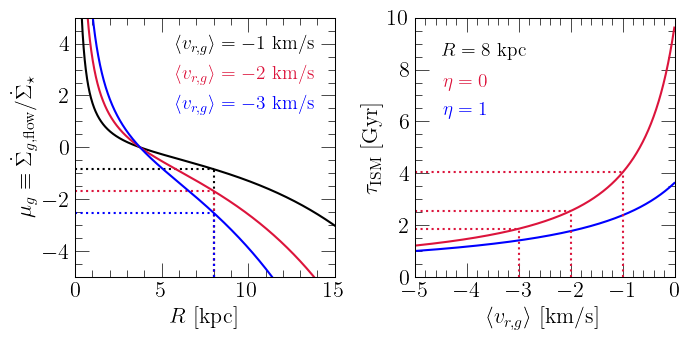

In [4]:
fig = plt.figure(figsize = (7, 3.5))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)
ax1.set_xlabel(r"$R$ [kpc]")
ax1.set_ylabel(r"$\mu_g \equiv \dot{\Sigma}_{g,\text{flow}} / \dot{\Sigma}_\star$")
ax2.set_xlabel(r"$\langle v_{r,g} \rangle$ [km/s]")
ax2.set_ylabel(r"$\tau_\text{ISM}$ [Gyr]")
ax1.set_xlim([0, 15])
ax1.set_ylim([-5, 5])
ax2.set_xlim([-5, 0])
ax2.set_ylim([0, 10])
ax2.set_xticks([-5, -4, -3, -2, -1, 0])

vgas = [-1, -2, -3]
colors = ["black", "crimson", "blue"]
radii = np.linspace(0, 15, 1000)
for i in range(len(vgas)):
    kwargs = {
        "c": named_colors()[colors[i]],
        "label": r"$\langle v_{r,g} \rangle = %g$ km/s" % (vgas[i])
    }
    mu = [mu_gas(r, vgas = vgas[i]) for r in radii]
    ax1.plot(radii, mu, **kwargs)
    mu = mu_gas(8, vgas = vgas[i])
    kwargs["label"] = None
    kwargs["linestyle"] = ":"
    ax1.plot([ax1.get_xlim()[0], 8], 2 * [mu], **kwargs)
    ax1.plot(2 * [8], [ax1.get_ylim()[0], mu], **kwargs)

velocities = np.linspace(-5, 0, 1000)
tau = [tau_ism(v, radius = 8) for v in velocities]
ax2.plot(velocities, tau, named_colors()["crimson"], label = r"$\eta = 0$")
tau = [tau_ism(v, eta = 1, radius = 8) for v in velocities]
ax2.plot(velocities, tau, named_colors()["blue"], label = r"$\eta = 1$")
velocities = [-1, -2, -3]
for v in velocities:
    kwargs = {
        "c": named_colors()["crimson"],
        "linestyle": ":"
    }
    tau = tau_ism(v, radius = 8)
    ax2.plot([ax2.get_xlim()[0], v], 2 * [tau], **kwargs)
    ax2.plot(2 * [v], [ax2.get_ylim()[0], tau], **kwargs)
ax2.text(-4.5, 8.5, r"$R = 8$ kpc", fontsize = 14)
kwargs = {
    "loc": mpl_loc("upper left"),
    "bbox_to_anchor": (0.02, 0.85),
    "ncol": 1,
    "handlelength": 0,
    "fontsize": 14
}
leg = ax2.legend(**kwargs)
fancy_legend(leg, ["crimson", "blue"])

kwargs = {
    "loc": mpl_loc("upper right"),
    "ncol": 1,
    "handlelength": 0,
    "fontsize": 14
}
leg = ax1.legend(**kwargs)
fancy_legend(leg, ["black", "crimson", "blue"])

plt.tight_layout()
for ext in ["pdf", "jpeg"]:
    kwargs = {}
    if ext == "jpeg": kwargs["dpi"] = 200
    plt.savefig("./mu_tauism.%s" % (ext), **kwargs)
plt.show()